In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [30]:
dataset = pd.read_csv('datasets/50_Startups.csv')

In [40]:
x = dataset.iloc[:, :-1].values
y = dataset['Profit'].values.reshape(-1, 1)

In [32]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
y_pred_reshape = y_pred.reshape(len(y_pred), 1)
y_test_reshape = y_test.reshape(len(y_test), 1)

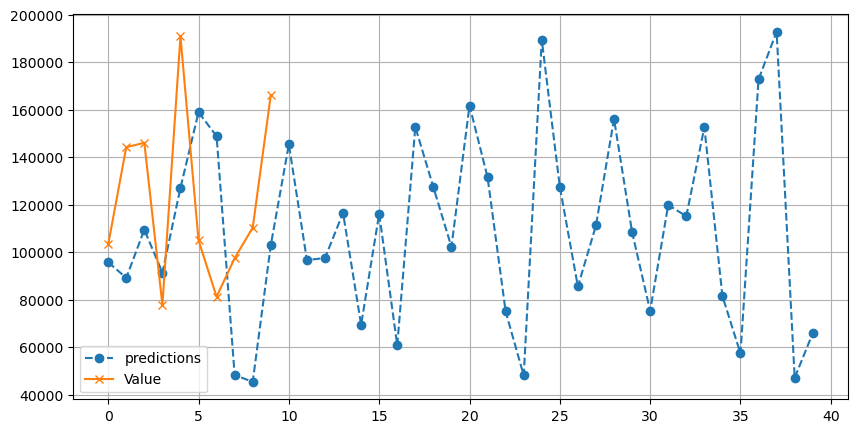

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(y_pred, label="predictions", marker='o', linestyle='--')

plt.plot(y_test_reshape, label="Value", marker='x')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
acc = r2_score(y_train, y_pred)
acc

0.9501847627493607

In [37]:
acc2 = r2_score(y_test, model.predict(x_test))
print(acc2)

0.9347068473282303
